[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1DRAJFXp_4KfAxHYCo_Gd9neVq3yM3ovE?usp=sharing)

In [421]:
"""
BrainHack Marseille 2024
Cyprien Dautrevaux and Alexandre Lainé
"""

'\nBrainHack Marseille 2024\nCyprien Dautrevaux and Alexandre Lainé\n'

# **Data manipulation and Vizualisation in Python**

The aim of this part of the tutorial is to introduce you to the [pandas](https://pandas.pydata.org/) and [matplotlib](https://matplotlib.org/) libraries, which are used to manage datasets and produce graphical representations respectively. To do this, we're going to use a dataset found on [kaggle](https://www.kaggle.com/) that you'll download when you run the next code cells.

PS : if you want a cheat sheet for pandas, you can use [this one](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

## Downloading the dataset 

In [373]:
import kagglehub
import os

In [374]:
# define the working directory and the dataset folder
cwd = os.getcwd()
datasets_folder = "datasets"
datasets_path = os.path.join(cwd, datasets_folder)
os.makedirs(datasets_path, exist_ok=True)

# downloading the dataset set from kaggle
kaggle_path = kagglehub.dataset_download(
    handle="ruslankl/mice-protein-expression",
    path=None, force_download=True
)
file_name = os.listdir(kaggle_path)[0]

# move the dataset from kaggle cache to our dataset fodler
initial_path = os.path.join(kaggle_path, file_name)
file_path = os.path.join(datasets_path, file_name)
try :
    os.rename(
        src=initial_path,
        dst=file_path
    )
except:
    pass

print(f"The file is in the good folder : {os.path.exists(file_path)}")

100%|██████████| 423k/423k [00:00<00:00, 1.05MB/s]

Extracting files...
The file is in the good folder : True


## Loading the dataset

To load the dataset, a good practice is to start by opening the dataset to find out more about how it is organised.

In [375]:
import pandas as pd

In [376]:
df = pd.read_csv(
    filepath_or_buffer=file_path, 
    decimal=".",
    sep=","
)

In [377]:
# the dataframe is organized in rows and columns
display(df)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


## Introduction to a pandas DataFrame

### _How to move into this DataFrame ?_

In [378]:
# each column has a name
df.keys()

Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

In [379]:
# we can select one columns with this semantic
display(df[["MouseID"]])

# here the output is still a DataFrame
print(type(df[["MouseID"]]))

,MouseID
0,309_1
1,309_2
2,309_3
3,309_4
4,309_5
...,...
1075,J3295_11
1076,J3295_12
1077,J3295_13
1078,J3295_14


<class 'pandas.core.frame.DataFrame'>


In [380]:
# we can select just the value of columns with those semantics
display(df["MouseID"]) # or df.MouseID

# and this time the output is a Series (like an array in numpy with indexs)
print(type(df["MouseID"]))

0          309_1
1          309_2
2          309_3
3          309_4
4          309_5
          ...   
1075    J3295_11
1076    J3295_12
1077    J3295_13
1078    J3295_14
1079    J3295_15
Name: MouseID, Length: 1080, dtype: object

<class 'pandas.core.series.Series'>


In [381]:
# and several columns with this one
df[["MouseID","Treatment"]]

,MouseID,Treatment
0,309_1,Memantine
1,309_2,Memantine
2,309_3,Memantine
3,309_4,Memantine
4,309_5,Memantine
...,...,...
1075,J3295_11,Saline
1076,J3295_12,Saline
1077,J3295_13,Saline
1078,J3295_14,Saline


In [382]:
# each row has index (represent here under a range index because the dataset is sorted by the index)
df.index

RangeIndex(start=0, stop=1080, step=1)

In [383]:
# each row has index (represent here under an index array because the dataset is not sorted by the index)
df.sort_values("pCAMKII_N").index

Index([ 914,  385,  644,  913,   27,  643,  912,   14,  629,   29,
       ...
       1038, 1022,  225, 1039, 1021, 1040, 1020,  987,  988,  989],
      dtype='int64', length=1080)

In [384]:
# to show you some specificity of pandas we have to shuffle the row indexs
df = df.sort_values("pCAMKII_N")
display(df)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
914,50810B_15,0.474926,0.601089,0.242115,1.791014,2.749263,0.202859,0.145450,1.343998,0.145450,...,0.146465,0.356773,0.142839,0.180523,0.162393,1.173660,Ts65Dn,Saline,C/S,t-CS-s
385,3497_11,0.290108,0.398810,0.204932,1.548186,2.742914,0.136196,0.133078,1.369898,0.112812,...,0.136136,0.390610,0.110160,0.165576,0.151530,1.082836,Control,Saline,C/S,c-CS-s
644,3504_15,0.490717,0.592462,0.213702,1.540847,2.053286,0.152432,0.134237,1.393799,0.142963,...,0.163502,0.300790,0.170223,0.187868,0.224332,1.236767,Ts65Dn,Memantine,C/S,t-CS-m
913,50810B_14,0.451402,0.631308,0.245794,1.810981,2.760748,0.198598,0.145327,1.402336,0.173131,...,0.133454,0.348046,0.118395,0.188758,0.178632,1.227963,Ts65Dn,Saline,C/S,t-CS-s
27,311_13,0.488372,0.540086,0.291310,1.913403,2.873623,0.215422,0.210526,1.414933,0.162485,...,NaN,0.411246,0.155773,0.222555,0.267759,0.981414,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,3525_6,0.423009,0.675926,0.439751,2.702308,5.899036,0.302004,0.215119,7.104642,0.273973,...,0.121351,0.472189,0.165100,0.190402,0.176126,1.161283,Ts65Dn,Saline,S/C,t-SC-s
1020,3517_1,0.415250,0.655787,0.403593,3.035518,5.781953,0.259737,0.205156,7.464070,0.251646,...,0.149058,0.424460,0.235349,NaN,0.227373,0.940527,Ts65Dn,Saline,S/C,t-SC-s
987,3426_13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.112854,0.405540,0.151693,0.163125,0.208852,1.443353,Ts65Dn,Saline,S/C,t-SC-s
988,3426_14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.120664,0.422986,0.175044,0.185038,0.195326,1.443269,Ts65Dn,Saline,S/C,t-SC-s


In [385]:
# with "".loc" we isolate the index = 0
df.loc[[0]]

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.21883,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.13179,0.128186,1.675652,Control,Memantine,C/S,c-CS-m


In [386]:
# with "".iloc" we isolate the first row of the DataFrame
df.iloc[[0]] # this function will soon be obsolete

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
914,50810B_15,0.474926,0.601089,0.242115,1.791014,2.749263,0.202859,0.14545,1.343998,0.14545,...,0.146465,0.356773,0.142839,0.180523,0.162393,1.17366,Ts65Dn,Saline,C/S,t-CS-s


### _Some basics functions_

In [387]:
print(f"{df.shape = }") 
print(f"{df.size = }")

df.shape = (1080, 82)
df.size = 88560


In [388]:
# show just few rows
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
914,50810B_15,0.474926,0.601089,0.242115,1.791014,2.749263,0.202859,0.145450,1.343998,0.145450,...,0.146465,0.356773,0.142839,0.180523,0.162393,1.173660,Ts65Dn,Saline,C/S,t-CS-s
385,3497_11,0.290108,0.398810,0.204932,1.548186,2.742914,0.136196,0.133078,1.369898,0.112812,...,0.136136,0.390610,0.110160,0.165576,0.151530,1.082836,Control,Saline,C/S,c-CS-s
644,3504_15,0.490717,0.592462,0.213702,1.540847,2.053286,0.152432,0.134237,1.393799,0.142963,...,0.163502,0.300790,0.170223,0.187868,0.224332,1.236767,Ts65Dn,Memantine,C/S,t-CS-m
913,50810B_14,0.451402,0.631308,0.245794,1.810981,2.760748,0.198598,0.145327,1.402336,0.173131,...,0.133454,0.348046,0.118395,0.188758,0.178632,1.227963,Ts65Dn,Saline,C/S,t-CS-s
27,311_13,0.488372,0.540086,0.291310,1.913403,2.873623,0.215422,0.210526,1.414933,0.162485,...,NaN,0.411246,0.155773,0.222555,0.267759,0.981414,Control,Memantine,C/S,c-CS-m


In [389]:
# gives some informations on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1080 entries, 914 to 989
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N          1

In [390]:
# give us a description on numerical columns
df.describe()

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
count,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,1077.000000,...,1080.000000,867.000000,795.000000,1080.000000,1005.000000,1080.000000,900.000000,870.000000,810.000000,1080.000000
mean,0.425810,0.617102,0.319088,2.297269,3.843934,0.233168,0.181846,3.537109,0.212574,1.428682,...,0.226676,0.157914,0.134762,0.121521,0.131053,0.446073,0.169609,0.183135,0.205440,1.337784
std,0.249362,0.251640,0.049383,0.347293,0.933100,0.041634,0.027042,1.295169,0.032587,0.466904,...,0.028989,0.029537,0.027417,0.014276,0.023863,0.066432,0.059402,0.040406,0.055514,0.317126
min,0.145327,0.245359,0.115181,1.330831,1.737540,0.063236,0.064043,1.343998,0.112812,0.429032,...,0.155869,0.088305,0.080657,0.067254,0.085419,0.258626,0.079691,0.105537,0.101787,0.586479
25%,0.288121,0.473361,0.287444,2.057411,3.155678,0.205755,0.164595,2.479834,0.190823,1.203665,...,0.206395,0.136424,0.115554,0.110839,0.113506,0.398082,0.125848,0.155121,0.165143,1.081423
50%,0.366378,0.565782,0.316564,2.296546,3.760855,0.231177,0.182302,3.326520,0.210594,1.355846,...,0.224000,0.152313,0.129468,0.121626,0.126523,0.448459,0.158240,0.174935,0.193994,1.317441
75%,0.487711,0.698032,0.348197,2.528481,4.440011,0.257261,0.197418,4.481940,0.234595,1.561316,...,0.241655,0.174017,0.148235,0.131955,0.143652,0.490773,0.197876,0.204542,0.235215,1.585824
max,2.516367,2.602662,0.497160,3.757641,8.482553,0.539050,0.317066,7.464070,0.306247,6.113347,...,0.358289,0.282016,0.261506,0.158748,0.256529,0.759588,0.479763,0.360692,0.413903,2.129791


## Everyday pandas

### _Some specific functions_

In [391]:
# the ".unique()" function displays the different unique values in a column
display(df["Treatment"].unique())

# but it's does'nt work on DataFrame
display(df[["Treatment"]].unique())

array(['Saline', 'Memantine'], dtype=object)

AttributeError: 'DataFrame' object has no attribute 'unique'

In [392]:
# the ".nunique()" function displays the number of unique values in a column
display(df["Treatment"].nunique())

# and this time it works on DataFrame
display(df[["Treatment"]].nunique())

2

Treatment    2
dtype: int64

In [393]:
# find some duplicates
display(df.duplicated())

914     False
385     False
644     False
913     False
27      False
        ...  
1040    False
1020    False
987     False
988     False
989     False
Length: 1080, dtype: bool

In [394]:
# find some Not.a.Number (NaN)
df.isna()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
914,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
385,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
644,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
913,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
27,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1020,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
987,False,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
988,False,True,True,True,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


In [395]:
# concatenate two DataFrame
df_1 = df.loc[df.index[:10],df.keys()[1:4]]
df_2 = df.loc[df.index[:20],df.keys()[-3:]]

print(df_1.shape, df_2.shape)

(10, 3) (20, 3)


In [396]:
c1_df = pd.concat(
    [df_1, df_2],
    axis=0
)
print(c1_df.shape)
display(c1_df) # the concatenation on the axis 0 take in count the name of each column and doesn't merge it

(30, 6)


,DYRK1A_N,ITSN1_N,BDNF_N,Treatment,Behavior,class
914,0.474926,0.601089,0.242115,NaN,NaN,NaN
385,0.290108,0.398810,0.204932,NaN,NaN,NaN
644,0.490717,0.592462,0.213702,NaN,NaN,NaN
913,0.451402,0.631308,0.245794,NaN,NaN,NaN
27,0.488372,0.540086,0.291310,NaN,NaN,NaN
643,0.567562,0.702098,0.232791,NaN,NaN,NaN
912,0.454020,0.633125,0.245065,NaN,NaN,NaN
14,0.374410,0.462313,0.344629,NaN,NaN,NaN
629,0.508555,0.614586,0.227770,NaN,NaN,NaN
29,0.485100,0.556375,0.287250,NaN,NaN,NaN


In [397]:
c2_df = pd.concat(
    [df_1, df_2.sort_index()],
    axis=1
)
print(c2_df.shape)
display(c2_df) # the concatenation on the axis 1 take in count the index of each rows

(20, 6)


,DYRK1A_N,ITSN1_N,BDNF_N,Treatment,Behavior,class
914,0.474926,0.601089,0.242115,Saline,C/S,t-CS-s
385,0.290108,0.398810,0.204932,Saline,C/S,c-CS-s
644,0.490717,0.592462,0.213702,Memantine,C/S,t-CS-m
913,0.451402,0.631308,0.245794,Saline,C/S,t-CS-s
27,0.488372,0.540086,0.291310,Memantine,C/S,c-CS-m
643,0.567562,0.702098,0.232791,Memantine,C/S,t-CS-m
912,0.454020,0.633125,0.245065,Saline,C/S,t-CS-s
14,0.374410,0.462313,0.344629,Memantine,C/S,c-CS-m
629,0.508555,0.614586,0.227770,Memantine,C/S,t-CS-m
29,0.485100,0.556375,0.287250,Memantine,C/S,c-CS-m


### _Using conditions_

In [398]:
# In pandas, conditions works on index and boolean values as often
df["Treatment"].unique()

# If we want to focus just on the mice that have been injected with "Memantine" we have to use conditions like this one
df_Memantine = df.loc[df["Treatment"] == "Memantine"]
display(df_Memantine)

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
644,3504_15,0.490717,0.592462,0.213702,1.540847,2.053286,0.152432,0.134237,1.393799,0.142963,...,0.163502,0.300790,0.170223,0.187868,0.224332,1.236767,Ts65Dn,Memantine,C/S,t-CS-m
27,311_13,0.488372,0.540086,0.291310,1.913403,2.873623,0.215422,0.210526,1.414933,0.162485,...,NaN,0.411246,0.155773,0.222555,0.267759,0.981414,Control,Memantine,C/S,c-CS-m
643,3504_14,0.567562,0.702098,0.232791,1.616395,2.150814,0.158070,0.142773,1.417141,0.145715,...,0.160362,0.282412,0.174749,0.212738,0.188652,1.225024,Ts65Dn,Memantine,C/S,t-CS-m
14,309_15,0.374410,0.462313,0.344629,1.861162,3.287123,0.221811,0.185459,1.444239,0.176422,...,0.125788,0.446562,0.160602,0.227937,0.224212,1.613897,Control,Memantine,C/S,c-CS-m
629,3429_15,0.508555,0.614586,0.227770,1.509677,2.204208,0.178682,0.149229,1.459187,0.155680,...,0.168393,0.347335,0.142965,0.208137,0.205688,1.159540,Ts65Dn,Memantine,C/S,t-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,3412_5,0.273375,0.437087,0.304831,2.375739,3.883559,0.257212,0.191519,6.477407,0.215850,...,0.156209,0.482668,0.177929,0.208973,0.235191,0.947345,Control,Memantine,S/C,c-SC-m
165,3412_1,0.270482,0.447235,0.281872,2.485934,4.341567,0.256210,0.180458,6.651297,0.215589,...,0.140500,0.478291,0.150139,0.192428,0.210056,0.927145,Control,Memantine,S/C,c-SC-m
166,3412_2,0.265892,0.452814,0.298376,2.481098,4.712686,0.249510,0.185942,6.763512,0.221367,...,0.132710,0.441692,0.144338,0.185962,0.202983,0.891220,Control,Memantine,S/C,c-SC-m
167,3412_3,0.274457,0.464007,0.303706,2.524066,4.609399,0.245492,0.182593,6.767571,0.236547,...,0.141888,0.448435,0.142558,0.188934,0.194375,0.872258,Control,Memantine,S/C,c-SC-m


In [399]:
# this very usefull funcition drop all rows wich have some NaN values
df.dropna()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
914,50810B_15,0.474926,0.601089,0.242115,1.791014,2.749263,0.202859,0.145450,1.343998,0.145450,...,0.146465,0.356773,0.142839,0.180523,0.162393,1.173660,Ts65Dn,Saline,C/S,t-CS-s
385,3497_11,0.290108,0.398810,0.204932,1.548186,2.742914,0.136196,0.133078,1.369898,0.112812,...,0.136136,0.390610,0.110160,0.165576,0.151530,1.082836,Control,Saline,C/S,c-CS-s
644,3504_15,0.490717,0.592462,0.213702,1.540847,2.053286,0.152432,0.134237,1.393799,0.142963,...,0.163502,0.300790,0.170223,0.187868,0.224332,1.236767,Ts65Dn,Memantine,C/S,t-CS-m
913,50810B_14,0.451402,0.631308,0.245794,1.810981,2.760748,0.198598,0.145327,1.402336,0.173131,...,0.133454,0.348046,0.118395,0.188758,0.178632,1.227963,Ts65Dn,Saline,C/S,t-CS-s
643,3504_14,0.567562,0.702098,0.232791,1.616395,2.150814,0.158070,0.142773,1.417141,0.145715,...,0.160362,0.282412,0.174749,0.212738,0.188652,1.225024,Ts65Dn,Memantine,C/S,t-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,3412_3,0.274457,0.464007,0.303706,2.524066,4.609399,0.245492,0.182593,6.767571,0.236547,...,0.141888,0.448435,0.142558,0.188934,0.194375,0.872258,Control,Memantine,S/C,c-SC-m
1038,3525_4,0.412268,0.645849,0.403841,2.594052,5.178686,0.288228,0.188104,6.860347,0.242751,...,0.112106,0.468660,0.159205,0.158993,0.172672,1.126489,Ts65Dn,Saline,S/C,t-SC-s
225,3500_1,0.346377,0.572398,0.327984,2.659054,5.347735,0.234045,0.185039,6.947290,0.220343,...,0.132257,0.475944,0.163255,0.198515,0.185728,0.957378,Control,Memantine,S/C,c-SC-m
1039,3525_5,0.430795,0.667131,0.425734,2.637525,5.378416,0.294028,0.216346,6.951164,0.264423,...,0.113200,0.471244,0.167415,0.172605,0.185299,1.171693,Ts65Dn,Saline,S/C,t-SC-s


In [400]:
# but we can do it with conditions !
df.loc[df.isna().sum(axis=1) == 0]

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
914,50810B_15,0.474926,0.601089,0.242115,1.791014,2.749263,0.202859,0.145450,1.343998,0.145450,...,0.146465,0.356773,0.142839,0.180523,0.162393,1.173660,Ts65Dn,Saline,C/S,t-CS-s
385,3497_11,0.290108,0.398810,0.204932,1.548186,2.742914,0.136196,0.133078,1.369898,0.112812,...,0.136136,0.390610,0.110160,0.165576,0.151530,1.082836,Control,Saline,C/S,c-CS-s
644,3504_15,0.490717,0.592462,0.213702,1.540847,2.053286,0.152432,0.134237,1.393799,0.142963,...,0.163502,0.300790,0.170223,0.187868,0.224332,1.236767,Ts65Dn,Memantine,C/S,t-CS-m
913,50810B_14,0.451402,0.631308,0.245794,1.810981,2.760748,0.198598,0.145327,1.402336,0.173131,...,0.133454,0.348046,0.118395,0.188758,0.178632,1.227963,Ts65Dn,Saline,C/S,t-CS-s
643,3504_14,0.567562,0.702098,0.232791,1.616395,2.150814,0.158070,0.142773,1.417141,0.145715,...,0.160362,0.282412,0.174749,0.212738,0.188652,1.225024,Ts65Dn,Memantine,C/S,t-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,3412_3,0.274457,0.464007,0.303706,2.524066,4.609399,0.245492,0.182593,6.767571,0.236547,...,0.141888,0.448435,0.142558,0.188934,0.194375,0.872258,Control,Memantine,S/C,c-SC-m
1038,3525_4,0.412268,0.645849,0.403841,2.594052,5.178686,0.288228,0.188104,6.860347,0.242751,...,0.112106,0.468660,0.159205,0.158993,0.172672,1.126489,Ts65Dn,Saline,S/C,t-SC-s
225,3500_1,0.346377,0.572398,0.327984,2.659054,5.347735,0.234045,0.185039,6.947290,0.220343,...,0.132257,0.475944,0.163255,0.198515,0.185728,0.957378,Control,Memantine,S/C,c-SC-m
1039,3525_5,0.430795,0.667131,0.425734,2.637525,5.378416,0.294028,0.216346,6.951164,0.264423,...,0.113200,0.471244,0.167415,0.172605,0.185299,1.171693,Ts65Dn,Saline,S/C,t-SC-s


In [401]:
# and if we change just the axis of the sum and the syntaxe in the ".loc" we can drop all columns that has some NaN values
df.loc[:,df.isna().sum(axis=0) == 0]

,MouseID,NUMB_N,P70S6_N,pGSK3B_N,pPKCG_N,CDK5_N,S6_N,ADARB1_N,AcetylH3K9_N,RRP1_N,...,Ubiquitin_N,pGSK3B_Tyr216_N,SHH_N,pS6_N,SYP_N,CaNA_N,Genotype,Treatment,Behavior,class
914,50810B_15,0.175084,0.898083,0.163559,0.697358,0.258353,0.541311,1.290728,0.066693,0.168998,...,1.103600,0.796037,0.204481,0.105543,0.356773,1.173660,Ts65Dn,Saline,C/S,t-CS-s
385,3497_11,0.191168,0.858091,0.149124,0.642005,0.251780,0.338176,1.025784,0.076198,0.177410,...,0.897729,0.606215,0.184722,0.097845,0.390610,1.082836,Control,Saline,C/S,c-CS-s
644,3504_15,0.145690,0.806755,0.165854,1.552512,0.222652,0.421106,0.823559,0.189212,0.166359,...,0.959503,0.919341,0.230718,0.100823,0.300790,1.236767,Ts65Dn,Memantine,C/S,t-CS-m
913,50810B_14,0.180839,0.934960,0.152927,0.684798,0.257173,0.532130,1.226925,0.066857,0.156173,...,1.058938,0.787875,0.228353,0.104894,0.348046,1.227963,Ts65Dn,Saline,C/S,t-CS-s
27,311_13,0.156718,0.704835,0.179083,0.902032,0.239408,0.170106,0.711608,0.118601,0.211529,...,1.103323,0.620413,0.225862,0.075445,0.411246,0.981414,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1040,3525_6,0.186232,1.014771,0.181709,2.553043,0.337692,0.440667,2.148067,0.233373,0.172592,...,1.553679,0.919217,0.259594,0.146512,0.472189,1.161283,Ts65Dn,Saline,S/C,t-SC-s
1020,3517_1,0.205988,0.807710,0.174200,1.841232,0.267195,0.316437,1.493758,0.372963,0.201248,...,1.307074,0.691770,0.222460,0.120160,0.424460,0.940527,Ts65Dn,Saline,S/C,t-SC-s
987,3426_13,0.180419,0.976257,0.193317,2.659534,0.304412,0.523670,1.052030,0.236699,0.177195,...,1.214422,0.997655,0.195369,0.115931,0.405540,1.443353,Ts65Dn,Saline,S/C,t-SC-s
988,3426_14,0.189153,1.009553,0.191799,2.636243,0.335391,0.525279,0.998971,0.236626,0.183422,...,1.224868,0.997942,0.194444,0.118607,0.422986,1.443269,Ts65Dn,Saline,S/C,t-SC-s


## Vizualisation

In [407]:
import matplotlib.pyplot as plt

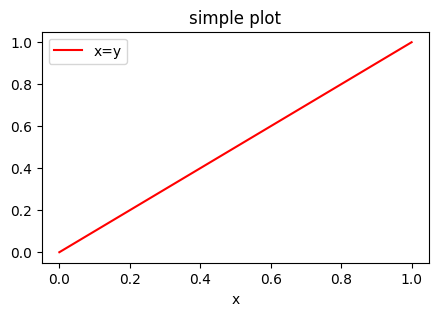

In [419]:
fig,ax = plt.subplots( # Creation of the figure
    nrows=1,
    ncols=1,
    figsize=(5,3)
)

ax.plot( # Creation of the plot in the figure
    [0,1],
    [0,1],
    color="red",
    label="x=y"
)

ax.set_xlabel("x") # esthetic parameters of the plot
ax.set_title("simple plot")
ax.legend()

plt.show() # Display the figure